# **DIT Test**

# Exploring the data with Jupyter Notebook

Author: Micah Guimarães do Carmo Navia

Contact: <a href='mailto:micahgcnavia@gmail.com'>micahgcnavia@gmail.com</a>

## Objectives

In this notebook I am going to:

*   Load the data
*   Explore and understand what each column means
*   Identify problems and guess what was the possible cause for each case
*   Propose solutions for each problem

## Summary

1. [Initial analysis](#initial_analysis)
2. [Number of registers over time](#registers_over_time)
3. [Exploring quantitative data](#exploring_quantitative_data)
4. [Exploring all columns](#general_exploration)
5. [Identifying problems](#identifying_problems)

---

In [1]:
from platform import python_version
print('Python version used in this Jupyter Notebook:', python_version())

Python version used in this Jupyter Notebook: 3.8.10


Loading useful packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import ast
import uuid
from fractions import Fraction
#!pip install tabulate -q
from tabulate import tabulate

Loading dataset

In [3]:
url = "https://drive.google.com/file/d/1dWC1ZUPNlCQBalYPY8uP4Zzs0aue9nkQ/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

try:
    df = pd.read_csv(path)
    print('Table loaded with success.')

except:
    print('Error when loading the table. Please contact the author.')

Table loaded with success.


<a id='initial_analysis'></a>
## Initial analysis

In [4]:
# Let's take a look at the columns

df.columns

Index(['id_paciente', 'sexo', 'obito', 'bairro', 'raca_cor', 'ocupacao',
       'religiao', 'luz_eletrica', 'data_cadastro', 'escolaridade',
       'nacionalidade', 'renda_familiar', 'data_nascimento',
       'em_situacao_de_rua', 'frequenta_escola', 'meios_transporte',
       'doencas_condicoes', 'identidade_genero', 'meios_comunicacao',
       'orientacao_sexual', 'possui_plano_saude', 'em_caso_doenca_procura',
       'situacao_profissional', 'vulnerabilidade_social',
       'data_atualizacao_cadastro', 'familia_beneficiaria_auxilio_brasil',
       'crianca_matriculada_creche_pre_escola', 'altura', 'peso',
       'pressao_sistolica', 'pressao_diastolica',
       'n_atendimentos_atencao_primaria', 'n_atendimentos_hospital',
       'updated_at', 'tipo'],
      dtype='object')

### Detailed description of each column:

(As this project uses data from home visits in the city of Rio de Janeiro, its content is in portuguese)

* **Patient ID** (`id_paciente`): Used to uniquely identify each patient of the dataset

* **Sex** (`sexo`): Patient's sex

* **Death** (`obito`): Flag to indicate whether the patient died

* **Neighborhood** (`bairro`): Neighborhood where the patient currently lives

* **Race** (`raca_cor`): Patient's race

* **Occupation** (`ocupacao`): Patient's current job

* **Religion** (`religiao`): Patient's religion


* **Electricity** (`luz_eletrica`): Flag to indicate whether the patient has access to electricity

* **Register Date** (`data_cadastro`): Register date of the patient

* **Education** (`escolaridade`): Patient's education level

* **Nationality** (`nacionalidade`): Patient's nationality

* **Family Income** (`renda_familiar`): Patient's family income in minimum wages

* **Birth Date** (`data_nascimento`): Patient's birth date

* **Homeless** (`em_situacao_de_rua`): Flag to indicate whether the patient is homeless

* **Attend School** (`frequenta_escola`): Flag to indicate whether the patient attends school

* **Means of Transport** (`meios_transporte`): Means of transport used by the patient 

* **Deseases** (`doencas_condicoes`): Patient's deseases

* **Gender Identity** (`identidade_genero`): Patient's gender identity

* **Means of Communication** (`meios_comunicacao`): Means of communication used by the patient

* **Sexual Orientation** (`orientacao_sexual`): Patient's sexual orientation

* **Health Plan** (`possui_plano_saude`): Flag to indicate whether the patient has a health plan

* **Treatment Facility** (`em_caso_doenca_procura`): Location where the patient seeks health treatment when sick

* **Employment Status** (`situacao_profissional`): Patient's employment status

* **Social Vulnerability** (`vulnerabilidade_social`): Flag to indicate whether the patient is in a situation of social vulnerability

* **Register Update Date** (`data_atualizacao_cadastro`): Date of last register update

* **Family benefits from Auxilio Brasil** (`familia_beneficiaria_auxilio_brasil`): Flag to indicate whether the patient's family benefits from the social assistance program Auxilio Brasil

* **Child Enrolled in Daycare or Pre-school** (`crianca_matriculada_creche_pre_escola`): Flag to indicate whether the patient is enrolled in daycare or in a pre-school facility

* **Height** (`altura`): Patient's height

* **Weight** (`peso`): Patient's weight

* **Systolic Pressure** (`pressao_sistolica`): Patient's systolic pressure

* **Diastolic Pressure** (`pressao_diastolica`): Patient's diastolic pressure

* **# of Primary Care Visits** (`n_atendimentos_atencao_primaria`): Number of primary care visits in the last year

* **# of Hospital Visits** (`n_atendimentos_hospital`): Number of hospital visits in the last year

* **Update Date** (`updated_at`): Date and time of latest update in the database

* **Kind** (`tipo`): Indicates whether the data is from a routine or historical flux from the database


In [5]:
df.head()

,id_paciente,sexo,obito,bairro,raca_cor,ocupacao,religiao,luz_eletrica,data_cadastro,escolaridade,...,familia_beneficiaria_auxilio_brasil,crianca_matriculada_creche_pre_escola,altura,peso,pressao_sistolica,pressao_diastolica,n_atendimentos_atencao_primaria,n_atendimentos_hospital,updated_at,tipo
0,cd6daa6e-038d-4952-af29-579e62e07f97,male,0,Parada de Lucas,Branca,Não se aplica,Sem religião,True,2021-06-24 00:00:00.000,Fundamental Incompleto,...,0,0,172.0,52.5,110.0,70.0,8,9,2021-06-01 00:00:00.000,historico
1,ad6cecb2-3a44-49ab-b2f3-6f9ffc2e2ec7,male,0,Cidade Nova,Parda,Assistente Administrativo,Evangélica,1,2021-01-07 00:00:00.000,Médio Incompleto,...,1,0,158.0,76.2,140.0,80.0,0,6,2020-06-25 00:00:00.000,historico
2,54e834e7-e722-4daa-8909-cf917a1247e6,male,0,Santa cruz,Parda,Não se aplica,Católica,1,2021-02-18 00:00:00.000,Fundamental Completo,...,0,0,53.0,82.5,180.0,60.0,5,2,2020-03-02 00:00:00.000,historico
3,c6a71e5e-0933-48d1-9d5a-8f448dc37f71,female,False,Bangu,Branca,Representante Comercial Autônomo,Sem religião,1,2022-03-09 10:40:37,Alfabetizado,...,1,1,164.0,90.6,120.0,70.0,0,27,2021-11-05 11:08:17.477,rotineiro
4,d5262a3c-e5d3-4195-a46b-0acd2533e1d6,male,0,Santíssimo,Branca,Técnico Eletricista,Outra,True,2022-12-13 18:30:45,Médio Completo,...,0,0,154.0,8.5,180.0,80.0,25,0,2020-11-11 00:00:00.000,historico


In [6]:
# Let's take a look at the quantitative data

df.describe()

,frequenta_escola,altura,peso,pressao_sistolica,pressao_diastolica,n_atendimentos_atencao_primaria,n_atendimentos_hospital
count,100000.000000,99975.000000,99816.000000,99960.000000,99983.000000,100000.000000,100000.000000
mean,0.158190,142.693589,63.801629,129.544068,79.378207,5.542710,7.312930
std,0.364921,38.659345,35.594173,21.406429,21.062140,5.204464,9.801987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,145.000000,50.700000,120.000000,70.000000,0.000000,0.000000
50%,0.000000,158.000000,67.900000,130.000000,80.000000,5.000000,2.000000
75%,0.000000,165.000000,82.000000,140.000000,87.000000,9.000000,13.000000
max,1.000000,810.000000,998.000000,900.000000,921.000000,32.000000,77.000000


In [7]:
# Check which columns have null values

df.columns[df.isnull().any()]

Index(['identidade_genero', 'altura', 'peso', 'pressao_sistolica',
       'pressao_diastolica'],
      dtype='object')

<a id='registers_over_time'></a>
## Exploring the number of registers over the years:

Let's take a look on the frequency of registers by analysing the **data_cadastro** column. 

In [8]:
df['data_cadastro'] = pd.to_datetime(df['data_cadastro'])

In [9]:
register_years = sorted(df['data_cadastro'].dt.year.unique())
register_years

[2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2021,
 2022,
 2023,
 2024,
 2025,
 2210]

Now we know that there were registers between 2012 and 2025 and that there are a possible typo with year = 2210 in the **data_cadastro** column. Let's check if this typo happened more than once:

In [10]:
df.loc[df['data_cadastro'].dt.year == register_years[-1]]

,id_paciente,sexo,obito,bairro,raca_cor,ocupacao,religiao,luz_eletrica,data_cadastro,escolaridade,...,familia_beneficiaria_auxilio_brasil,crianca_matriculada_creche_pre_escola,altura,peso,pressao_sistolica,pressao_diastolica,n_atendimentos_atencao_primaria,n_atendimentos_hospital,updated_at,tipo
25365,441434ab-0884-435a-a18f-7851bf44e165,male,0,Tijuca,Parda,Barbeiro,Outra,True,2210-07-15 18:16:26.967,Médio Completo,...,0,1,169.0,96.0,120.0,70.0,12,0,2019-10-09 12:00:00,historico


Considering the year range obtained previously, this entry might actually refer to 2021. However, we cannot be certain of that and replacing a data like this could pollute the dataset. One possible way of dealing with this problem is to create a flag that indicates whether there is a typo in the data.

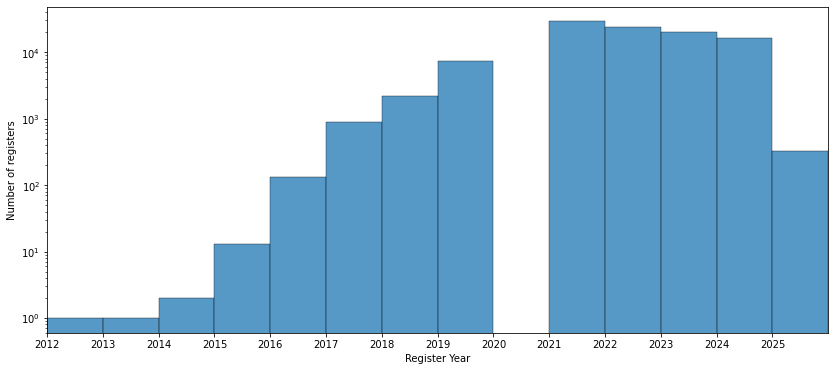

In [11]:
min_year = df['data_cadastro'].dt.year.min()

fig, ax = plt.subplots(figsize=(14,6), facecolor='white')

sns.histplot(x=df['data_cadastro'].dt.year, binwidth=1)

plt.xlim(min_year, register_years[-2]+1) # Not considering the outlier
plt.xticks(np.arange(min_year, register_years[-2]+1, 1))

plt.yscale('log')

plt.xlabel('Register Year')
plt.ylabel('Number of registers')

plt.show()

In [12]:
df.loc[df['data_cadastro'].dt.year == 2020]

,id_paciente,sexo,obito,bairro,raca_cor,ocupacao,religiao,luz_eletrica,data_cadastro,escolaridade,...,familia_beneficiaria_auxilio_brasil,crianca_matriculada_creche_pre_escola,altura,peso,pressao_sistolica,pressao_diastolica,n_atendimentos_atencao_primaria,n_atendimentos_hospital,updated_at,tipo


This is a fake inconsistency that was meant to represent the pandemic start in 2020, when the number of home visits had to drop significantly to prevent COVID19 dissemination.

Now let's check if there are any more typos/errors in other date columns

In [88]:
dates = ['data_cadastro', 'data_nascimento', 'data_atualizacao_cadastro', 'updated_at']

dates_table = []

for date in dates:

    dates_table.append([date, df[date].min(), 
                        len(df.loc[df[date] == df[date].min()]), df[date].max(),
                        len(df.loc[df[date] == df[date].max()])])

headers = ["Column", "Earliest entry","# of occurrences", "Latest entry", "# of occurrences"]
print(tabulate(dates_table, headers=headers, tablefmt="pretty"))

+---------------------------+-------------------------+------------------+-------------------------+------------------+
|          Column           |     Earliest entry      | # of occurrences |      Latest entry       | # of occurrences |
+---------------------------+-------------------------+------------------+-------------------------+------------------+
|       data_cadastro       | 2012-12-26 00:00:00.000 |        1         | 2210-07-15 18:16:26.967 |        1         |
|      data_nascimento      |       1911-07-11        |        1         |       2025-01-30        |        1         |
| data_atualizacao_cadastro |   1900-01-01 00:00:00   |       1012       |   2025-02-10 12:59:06   |        1         |
|        updated_at         | 1900-01-01 00:00:00.000 |       1063       |   2025-02-10 11:38:09   |        1         |
+---------------------------+-------------------------+------------------+-------------------------+------------------+


The `1900-01-01 00:00:00.000` error looks like a system default problem. For all these cases we can add flag columns to indicate that there is an error in the data. This approach is not always the best, but as we do not want to lose data from other columns, we can use these flags to filter the dataset later instead of just deleting the problematic rows.

<a id='exploring_quantitative_data'></a>
## Exploring the quantitative data:

In [14]:
quantitative_summary = df.describe()
quantitative_columns = list(df.describe().columns)
quantitative_summary

,frequenta_escola,altura,peso,pressao_sistolica,pressao_diastolica,n_atendimentos_atencao_primaria,n_atendimentos_hospital
count,100000.000000,99975.000000,99816.000000,99960.000000,99983.000000,100000.000000,100000.000000
mean,0.158190,142.693589,63.801629,129.544068,79.378207,5.542710,7.312930
std,0.364921,38.659345,35.594173,21.406429,21.062140,5.204464,9.801987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,145.000000,50.700000,120.000000,70.000000,0.000000,0.000000
50%,0.000000,158.000000,67.900000,130.000000,80.000000,5.000000,2.000000
75%,0.000000,165.000000,82.000000,140.000000,87.000000,9.000000,13.000000
max,1.000000,810.000000,998.000000,900.000000,921.000000,32.000000,77.000000


We can immediately verify that the columns for height and weight, as well as the columns for blood pressure, show maximum and minimum values that are very far from the mean, considering the standard deviation. To investigate these issues more deeply, we can use box plots:

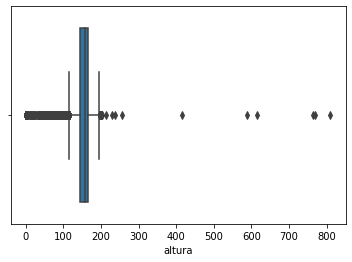

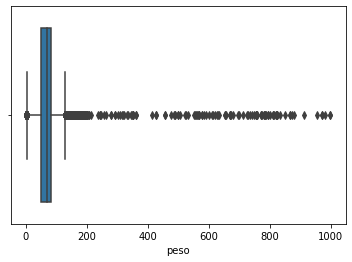

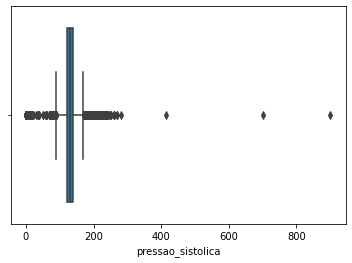

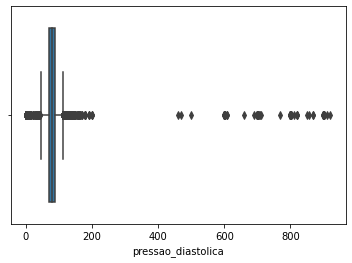

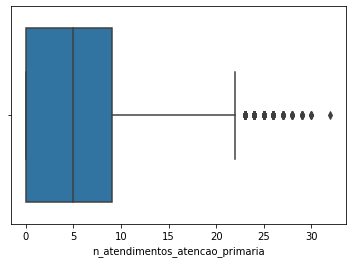

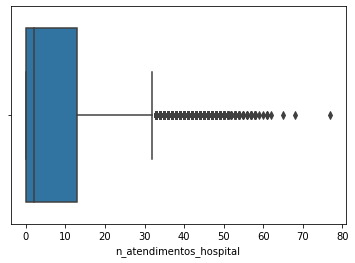

In [15]:
for col in quantitative_columns[1:]: # excluding the column 'frequenta_escola' because it is a flag (0 or 1 values).

    fig, ax = plt.subplots(figsize=(6,4), facecolor='white')
    sns.boxplot(x=df[col])
    plt.show()

In [16]:
#!pip install tabulate -q
from tabulate import tabulate

# Initialize an empty list to store the rows
table_df = []

# Loop through the columns and calculate quartiles
for col in quantitative_columns[1:]:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.5)
    Q3 = df[col].quantile(0.75)
    table_df.append([col, Q1, Q2, Q3])  # Append as a row

# Define headers
headers = ["Parameter", "Q1", "Q2", "Q3"]

# Print the table
print(tabulate(table_df, headers=headers, tablefmt="pretty"))

+---------------------------------+-------+-------+-------+
|            Parameter            |  Q1   |  Q2   |  Q3   |
+---------------------------------+-------+-------+-------+
|             altura              | 145.0 | 158.0 | 165.0 |
|              peso               | 50.7  | 67.9  | 82.0  |
|        pressao_sistolica        | 120.0 | 130.0 | 140.0 |
|       pressao_diastolica        | 70.0  | 80.0  | 87.0  |
| n_atendimentos_atencao_primaria |  0.0  |  5.0  |  9.0  |
|     n_atendimentos_hospital     |  0.0  |  2.0  | 13.0  |
+---------------------------------+-------+-------+-------+


### First Impression of the Data:

**Height Column:** It appears to have been filled in centimeters, based on the quartile values. There are some very discrepant values, such as those above 400 cm and below 40 cm (considering the size of a newborn baby). Guess: A likely source of error could be incorrect data entry during input.

**Weight Column:** It seems to have been filled in kilograms, based on the quartile values. There are some very discrepant values, such as those above 200 kg and very close to zero (considering that the weight of a newborn baby typically ranges from 2 to 4 kilograms). Guess: Similar to the height column, a likely source of error could be incorrect data entry during input.

**Blood Pressure Columns:** They appear to have been filled in mmHg, based on the quartile values. Since I am not from the healthcare field, I wouldn’t initially know if there are discrepant values. Therefore, I did some quick research:

- **Diastolic Pressure:** For an adult (18+ years), normal values are considered to be less than 85 mmHg [(source)](https://bvsms.saude.gov.br/bvs/publicacoes/III_consenso_bras_hip_arterial.pdf).
- **Systolic Pressure:** For an adult (18+ years), normal values are considered to be less than 130 mmHg [(source)](https://bvsms.saude.gov.br/bvs/publicacoes/III_consenso_bras_hip_arterial.pdf).

Therefore, there are indeed discrepant values in both columns.

**Number of Appointments Columns:** Both columns refer to appointments in the last year. If we consider that a person had two appointments per week, maintaining this frequency throughout the year (2 days × 4 weeks × 12 months), they would have had 96 appointments in the year. Therefore, despite being high, the values in these two columns do not seem to present any issues, at first glance.

### Exploring height and weight columns together

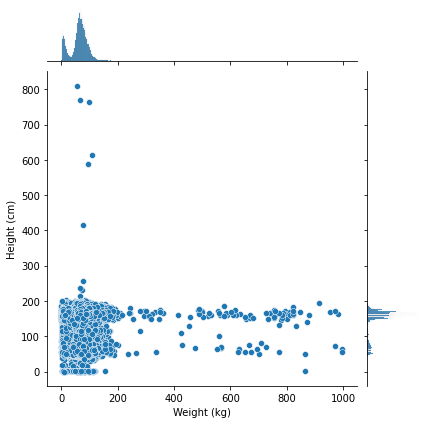

In [17]:
sns.jointplot(x=df['peso'], y=df['altura'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

We can try to identify the outliers numerically using the IQR (interquartile range) method:

In [18]:
def calculate_IQR_lims(data, col, factor=1.5):

    """
    Calculate the lower and upper limits for identifying outliers using the Interquartile Range (IQR) method.

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataset containing the column for which the IQR limits are to be calculated.
    col : str
        The name of the column in the dataset to calculate the IQR limits for.
    factor : float, optional (default=1.5)
        The multiplier for the IQR to determine the lower and upper limits. A common choice is 1.5, 
        but it can be adjusted based on the desired sensitivity for outlier detection.

    Returns:
    --------
    lower_lim : float
        The lower limit for identifying outliers. Values below this limit are considered outliers.
    upper_lim : float
        The upper limit for identifying outliers. Values above this limit are considered outliers.

    Notes:
    ------
    The IQR method identifies outliers by calculating the range between the first quartile (Q1) 
    and the third quartile (Q3). Outliers are typically defined as values that fall below 
    `Q1 - factor * IQR` or above `Q3 + factor * IQR`.
    """

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_lim = Q1 - factor * IQR
    upper_lim = Q3 + factor * IQR

    return lower_lim, upper_lim

In [19]:
# List of columns to analyze
columns_to_analyze = ['altura', 'peso']

limits = {}

# Loop through each column and calculate IQR limits and median
for col in columns_to_analyze:
    # Calculate IQR limits
    limits[col] = (calculate_IQR_lims(df, col))
    
    # Calculate median
    median = df[col].quantile(0.5)
    
    # Print results
    if col == 'altura':
        param = 'Height'
        unit = 'cm'
    elif col == 'peso':
        param = 'Weight'
        unit = 'kg'
    
    print(f'{param} limits: {round(limits[col][0])} and {round(limits[col][1])} {unit}. Median: {median} {unit}.')

Height limits: 115 and 195 cm. Median: 158.0 cm.
Weight limits: 4 and 129 kg. Median: 67.9 kg.


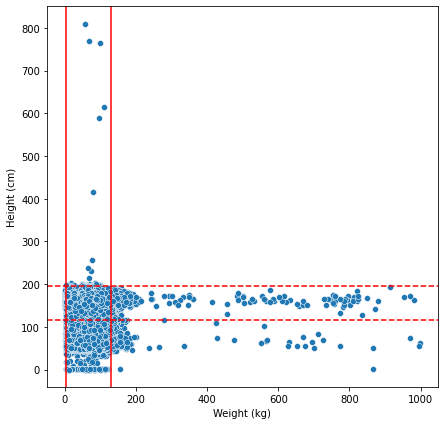

In [20]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='white')

sns.scatterplot(x=df['peso'], y=df['altura'])

# Adding the limits for each column:

plt.axvline(x=limits['peso'][0], ls='-', color='red')
plt.axvline(x=limits['peso'][1], ls='-', color='red')

plt.axhline(y=limits['altura'][0], ls='--', color='red')
plt.axhline(y=limits['altura'][1], ls='--', color='red')

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

Now we have a better understanding of which data points might actually be errors. However, as we previously mentioned, we should also consider the heights and weights of newborn babies. Therefore, it would be interesting to extend the lower height limit to 40 cm.

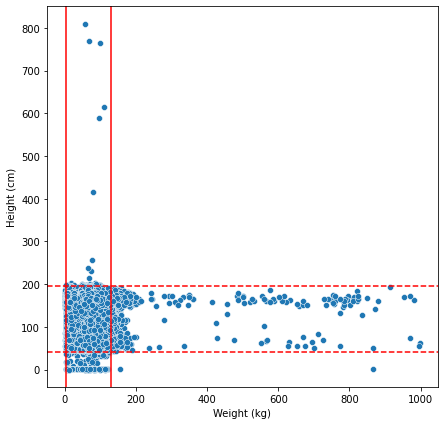

In [21]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='white')

sns.scatterplot(x=df['peso'], y=df['altura'])

plt.axvline(x=limits['peso'][0], ls='-', color='red')
plt.axvline(x=limits['peso'][1], ls='-', color='red')

plt.axhline(y=40, ls='--', color='red')
plt.axhline(y=limits['altura'][1], ls='--', color='red')

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

We can use the [IMC table](https://www.msdmanuals.com/pt/profissional/multimedia/table/%C3%ADndice-de-massa-corporal-imc) to argue that the points outside the box defined by the IQR limits are non-representative measurements.

<a id='general_exploration'></a>
## Exploring all columns

To better understand how the data is structured in each column, I created the following function to identify the most evident problems. 

**Warning:** since it covers all 35 columns, the output is very large and can be annoying to read. Feel free to run the function and see the results. 

Click [here](#identifying_problems) to get to the main findings.

In [8]:
def analyze_table(data, N_unique=10, N_example=10, display_info=False):

    """
    Analyse each column to identify possible errors.

    Parameters:
    -----------
    data : pandas.DataFrame
        The dataset containing the columns to be analyzed.
    N_example : int
        Number of values to display as a preview
    N_unique : int
        Number of unique values to display as a preview
    display_info : boolean
        Flag to display info for all columns

    Returns:
    --------
    column_info : dict
        A dictionary that stores information of each column from the data
    """

    # Deleting exact duplicates
    data = data.drop_duplicates()
    
    column_info = {}

    random_state = np.random.seed(42)
    
    for col in data.columns:

        n_unique = data[col].nunique()

        column_info[col] = {
            'Data type': data[col].dtype,
            'Number of unique values': n_unique,
            'Example of unique values': data[col].unique() if n_unique <=N_unique else f'too many to show (more than {N_unique})',
            'Number of null values': data[col].isnull().sum(),
            'Total number of entries': len(data[col]),
            'Preview': data[col].dropna().sample(min(N_example, len(data[col])), random_state=random_state).tolist()
        }
    
    # Display info

    if display_info:
        for col, info in column_info.items():
            print(f"Column: {col}")
            for key, value in info.items():
                print(f"  {key}: {value}")
            print("-" * 150)
    else:
        print('Table scanned successfully.')

    return column_info

In [23]:
column_info = analyze_table(df, display_info=False) # change display_info to True to see the analysis for all columns

Table scanned successfully.


---

<a id='identifying_problems'></a>
# Identifying problems and proposing solutions

To better organize the analysis, it is a good idea to filter the data in groups of columns with alike errors

<details><summary> 0, 1, True, False errors</summary>

Columns: 
- **obito**
- **luz_eletrica**
- **em_situacao_de_rua**
- **possui_plano_saude**
- **vulnerabilidade_social**
- **familia_beneficiaria_auxilio_brasil**
- **crianca_matriculada_creche_pre_escola** 

**Problem:** these columns are flags and the answer must be 0 or 1 OR True or False, but not both.

**Possible cause of the issue/Suggestions for the next data retrieval:** The data collection system likely failed to identify True and False values as booleans, treating them as strings instead. Instruct healthcare workers to input only 0 or 1.

**Solution:** Standardize the values to the integers 0 and 1.

</details>


<details> <summary> Date columns</summary>

Columns: 
- **data_cadastro**
- **data_nascimento**
- **data_atualizacao_cadastro**
- **updated_at**

**Problem:** Some outliers and the data is not standardize (some have miliseconds, some are in DD/MM/YYYY format, etc) 

**Possible cause of the issue/Suggestions for the next data retrieval:** The system did not collect the milliseconds correctly in some of the date columns and some entries are getting a possible default problem.

**Solution:** Transform to _datetime_. Add flag to indicate rows with problems.

</details>

<details><summary>Lists as strings, unicode problems, null values</summary>

Columns: 
- **meios_transporte**
- **doencas_condicoes**
- **meios_comunicacao**
- **em_caso_doenca_procura**

**Problem:** Incorrect formatting (characters such as accents are returned as Unicode code), empty values that are actually of type '[]', lists within strings.

**Possible cause of the issue/Suggestions for the next data retrieval:** The data collection system does not correctly interpret when a list of values is provided as input.

**Solution:** Standardize the data.

</details>

<details>
  <summary>Columns with specific errors</summary>

  - <details>
      <summary>identidade_genero and orientacao_sexual</summary>

      - **Problem:** In both, there are records of the type 'Homosexual (gay/lesbian)'. In the `identidade_genero` column, there are several null values, as well as some 'No' and 'Yes' values as well as values that should actualy be in `orientacao_sexual` column.

      - **Possible cause of the issue/Suggestions for the next data retrieval:** Instruct the healthcare professional to enter only 'Homosexual' in cases of gay or lesbian and and emphasize that sexual orientation and gender identity are two different things. The responses 'Yes' and 'No' may be related to a lack of information from the person being interviewed or a misinterpretation by the person collecting the data. 

      - **Solution:** Transform 'Yes', 'No', and null values into 'Not informed'. Simplify 'Homosexual (gay/lesbian)' to 'Homosexual'. Replace sexual orientation entries in gender identity column to 'Não informado'.
    </details>

  - <details>
      <summary>raca_cor</summary>

      - **Problem:** Some rows with 'No' values.

      - **Possible cause of the issue/Suggestions for the next data retrieval:** In this case, it may have happened that the interviewee did not feel comfortable disclosing their race.

      - **Solution:** Transform 'No' to 'Do not wish to inform'.
    </details>

  - <details>
      <summary>ocupacao</summary>

      - **Problem:** Some rows with the subcategory of the job in parentheses.

      - **Possible cause of the issue/Suggestions for the next data retrieval:** Since there is no column for the job category, the information ended up encapsulated.

      - **Solution:** Extract the category information when available and create the column **categoria_ocupacao**.
    </details>

  - <details>
      <summary>religiao</summary>

      - **Problem:** Random values ['Acomp. Cresc. e Desenv. da Criança', 'ORQUIDEA', 'ESB ALMIRANTE', '10 EAP 01'], 'No', 'Yes', 'No religion'.

      - **Possible cause of the issue/Suggestions for the next data retrieval:** The healthcare worker likely filled in the wrong field.
      
      - **Solution:** Transform random values into 'No information', 'No' into 'No religion', and 'Yes' into 'Other'.
    </details>

  - <details>
      <summary>escolaridade</summary>

      - **Problem:** 'Não sabe ler/escrever', 'Especialização/Residência'

      - **Possible cause of the issue/Suggestions for the next data retrieval:** The healthcare worker was not properly instructed to fill in the data. Values with '/' make data analysis difficult. Instruct the worker to write only one category.
      
      - **Solution:** Transform 'Não sabe ler/escrever' into 'Iletrado' and 'Especialização/Residência' into 'Especialização ou Residência'.
    </details>

  - <details>
      <summary>situacao_profissional</summary>

      - **Problem:** 'Não se aplica' and 'Não trabalha' (the same information with two different tags), differentiation between having or not having social security, incorrect entry: 'SMS CAPS DIRCINHA E LINDA BATISTA AP 33', unnecessary detail: 'Médico Urologista', use of '/': 'Pensionista / Aposentado'.

      - **Possible cause of the issue/Suggestions for the next data retrieval:** The healthcare worker was not properly instructed to fill in the data. There was an error in column entry for the value 'SMS CAPS DIRCINHA E LINDA BATISTA AP 33'. The distinction between formal and informal employment did not account for the case Médico Urologista'. Instruct the worker to enter only one category, for example: 'Pensionista' OR 'Aposentado'.
      
      - **Solution:** Transform values 'Does not apply' and 'Does not work' into 'Unemployed', 'SMS CAPS DIRCINHA E LINDA BATISTA AP 33' into 'Not informed', 'Urologist Doctor' into 'Formal Employment', and 'Pensioner / Retired' into 'Pensioner or Retired'. Create the column **previdencia_social** to contain information on whether the person has social security or not and establish rules for each category.
    </details>  

  - <details>
      <summary>renda_familiar</summary>

      - **Problem:** measured in minimum wages. Incorrect categories: 'Manhã' and 'Internet'.

      - **Possible cause of the issue/Suggestions for the next data retrieval:** Incorrect column entry by the healthcare worker for the inputs 'Manhã' and 'Internet'.
      
      - **Solution:**  Instead of writing 'Minimum Wage' in each entry, keep only the numerical value, converting fractions to floats when necessary. Replace the value 'More than 4 Minimum Wages' with '+4'.
    </details>

  - <details>
      <summary>id_paciente</summary>

      **Problem:** Repeated values (duplicates and triplicates).

      **Possible cause of the issue/Suggestions for the next data retrieval:** It may have occurred that the healthcare worker collected the data using the same ID as the previous interviewee due to lack of attention. The data collection system should implement a safety lock to prevent repeated values in this column.

      **Solution:** The solution for this column is more complex due to its significance. Ideally, each ID should represent a unique patient. However, with repeated entries, we have two possible scenarios:

        1. It is, in fact, the same patient but with an updated record;

        2. It is another person but with the same ID;

      To investigate this, the best approach would be to check the number of columns with different values for each duplicate. If the **data_nascimento** varies, then it is the second scenario. Otherwise, the first scenario should be considered. This raises an interesting discussion in the context of transgender patients who may have changed their gender between two different visits. For this, I emphasize the importance of correctly filling out the 'gender_identity' column.

      The solution for the first scenario is to delete the old record(s), keeping only the most recent one, filtered by the **data_atualizacao_cadastro** column. For the second scenario, the solution is to generate a new ID and replace the repeated values. Since the database is constantly being updated, this solution is not the most appropriate but can serve as a temporary fix until the system issue is resolved.

      Another factor to consider is whether all entries in this column comply with the established UUID standard.    
  
</details>

<details><summary>Columns with no apparent errors</summary>

- **sexo**
- **bairro**
- **nacionalidade**
- **frequenta_escola**
- **tipo**

</details>
